# Introduction

Recommender systems are among the most popular applications of data science today. They are used to predict the *rating* or *preference* that an user would give to an item. Amazon uses it to suggest products to customers. YouTube uses recommender systems to decide which video to play next on autoplay.

There are also popular recommder systems for domains like restaurants and movies. Recommender systems have also been developed to explore research articles and experts, collaborators and financial services. YouTube uses the recommendation system at a large scale to suggest videos based on your history.

Recommender systems can be classified primarily into 3 types:

- <u>Simple recommenders</u>: Offer generalized recommendations to every user, based on movie popularity and/or genre.  The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. For example, IMDB Top 250.

- <u> Content-based recommenders</u>: These recommenders suggest similar items based on a particular item. This system uses item metadata, such as genre, director, actors etc, for movies, to make these recommendations. The general idea behind these systems is that if a person likes a particular item, he will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. For example, YouTube, where based on your history, the system suggests new videos that you can potentially watch.

- <u> Collaborative filtering</u>: These systems are widely used, and they try to predict the rating or preference that an user would give an item-based on past ratings and preferences of other  users. Collaborative filtering based recommendation systems do not require item metadata like content-based ones.

## Dataset

The dataset files contain metadata for 9742 movies listed in the [`MovieLens Dataset`](https://grouplens.org/datasets/movielens/). The dataset consists of movies released on or before September 2018. The dataset captures feature points like cast, crew, TMDB vote counts and vote averages. Download the dataset from [here](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip).

This dataset consists of the following files:

* *movies.csv*: Each line of this file after the header row represents one movie, and has the following format:

*****
    movieId,title,genres
*****

Genres are a a pipe-separated list. Some common genres are: Action, Adventure, Animation, Comedy, Crime etc.

* *links.csv*: This file contains the TMDB and IMDB IDs of all the movies featured in the `MovieLens Dataset`.

* *ratings.csv*: This file contains 100836 ratings across 9742 movies from 610 users. Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid", palette="icefire")

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.chdir('D:\Teaching\Python-Tutorial\data\ml-latest-small')
os.getcwd()

'D:\\Teaching\\Python-Tutorial\\data\\ml-latest-small'

In [3]:
# Load data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [4]:
movies['genres'] = movies['genres'].fillna('[]').apply(lambda x: [str(i) for i in x.split('|')])

movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"


In [5]:
from wordcloud import WordCloud

list_of_genres = list(movies['genres'].values)

list_of_genres[:5]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy']]

(-0.5, 399.5, 199.5, -0.5)

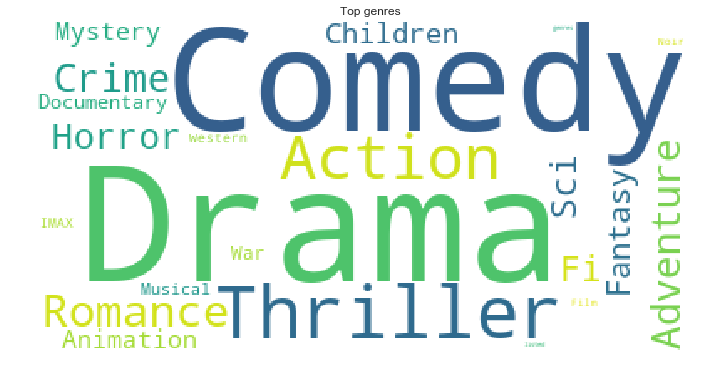

In [6]:
fig = plt.figure(figsize = (12,8))
text = ' '.join([i for j in list_of_genres for i in j])

wordcloud = WordCloud(max_font_size=None, background_color='white', 
                      collocations=False).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis('off')

In [7]:
import re

def get_year(x):
    m = re.search(r"\((\d+)\)",str(x))
    if m is not None:
        return m.group(1)
    else:
        return ''

movies['year'] = movies['title'].apply(get_year)
movies['title'] = movies['title'].apply(lambda x: x.split('(')[0].strip())

movies

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995
5,6,Heat,"[Action, Crime, Thriller]",1995
6,7,Sabrina,"[Comedy, Romance]",1995
7,8,Tom and Huck,"[Adventure, Children]",1995
8,9,Sudden Death,[Action],1995
9,10,GoldenEye,"[Action, Adventure, Thriller]",1995


In [8]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0A4C9750>],
      dtype=object)

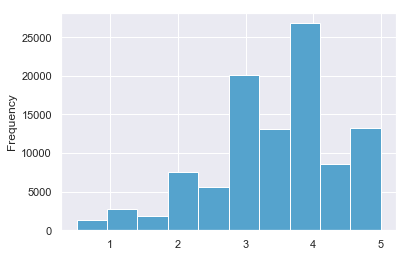

In [9]:
ratings['rating'].plot(kind='hist', subplots=True)

The `ratings` DataFrame contains the IDs of the movies but not their titles. We'll need movie names for the movies we're recommending. We can merge the above two DataFrames, based on the column `movieId`. For more details on merging two *DataFrames*, look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

In [10]:
metadata = pd.merge(movies, ratings, on="movieId")
metadata.head(3)

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1,4.0,964982703
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,5,4.0,847434962
2,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,7,4.5,1106635946


Lets add a column to the above DataFrame, which represents the average rating of each movie. To do so, we can group the dataset by the title of the movie and then calculate the mean of the rating for each movie.

In [11]:
vote_average = pd.DataFrame(metadata.groupby('title')['rating'].mean()).astype(int)
vote_count = pd.DataFrame(metadata.groupby('title')['rating'].count()).astype(int)

vote_count.head()

,rating
title,
,42
'71,1
'Hellboy': The Seeds of Creation,1
'Round Midnight,2
'Salem's Lot,1


In [12]:
# Add ratings and count
d_movies = pd.merge(movies, vote_average, on='title', how='left')
d_movies = pd.merge(d_movies, vote_count, on='title', how='left')

# Rename columns to vote_average and vote_count
d_movies = d_movies.rename(columns={'rating_x' : 'vote_average', 'rating_y': 'vote_count'})

d_movies.head()

,movieId,title,genres,year,vote_average,vote_count
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,3.0,215.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,3.0,110.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,3.0,52.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,2.0,7.0
4,5,Father of the Bride Part II,[Comedy],1995,3.0,49.0


Let us join `tags` column as well. Each tag is typically a single word or short phrase. The meaning, value and purpose of a particular tag is determined by the user. Note that some movies are also present in our DataFrame with no tags.

In [13]:
tags = pd.read_csv('tags.csv')

tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
tags_df = pd.DataFrame(tags.groupby('movieId')['tag'].apply(lambda x: '{}'.format('|'.join(x))))

d_movies = pd.merge(d_movies, tags_df, on='movieId', how='left', validate='one_to_one')
d_movies.head()

,movieId,title,genres,year,vote_average,vote_count,tag
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,3.0,215.0,pixar|pixar|fun
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,3.0,110.0,fantasy|magic board game|Robin Williams|game
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,3.0,52.0,moldy|old
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,2.0,7.0,NaN
4,5,Father of the Bride Part II,[Comedy],1995,3.0,49.0,pregnancy|remake


Finally, let us also join the TMDB and IMDB IDs so as to generate the complete matrix.

In [15]:
links = pd.read_csv('links.csv')

d_movies = pd.merge(d_movies, links, on='movieId', how='left')
d_movies.head(10)

,movieId,title,genres,year,vote_average,vote_count,tag,imdbId,tmdbId
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,3.0,215.0,pixar|pixar|fun,114709,862.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,3.0,110.0,fantasy|magic board game|Robin Williams|game,113497,8844.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,3.0,52.0,moldy|old,113228,15602.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,2.0,7.0,NaN,114885,31357.0
4,5,Father of the Bride Part II,[Comedy],1995,3.0,49.0,pregnancy|remake,113041,11862.0
5,6,Heat,"[Action, Crime, Thriller]",1995,3.0,102.0,NaN,113277,949.0
6,7,Sabrina,"[Comedy, Romance]",1995,3.0,84.0,remake,114319,11860.0
7,8,Tom and Huck,"[Adventure, Children]",1995,2.0,8.0,NaN,112302,45325.0
8,9,Sudden Death,[Action],1995,3.0,16.0,NaN,114576,9091.0
9,10,GoldenEye,"[Action, Adventure, Thriller]",1995,3.0,132.0,NaN,113189,710.0


In [16]:
d_movies.isnull().sum()

movieId            0
title              0
genres             0
year               0
vote_average      15
vote_count        15
tag             8170
imdbId             0
tmdbId             8
dtype: int64

In [17]:
d_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 0 to 9741
Data columns (total 9 columns):
movieId         9742 non-null int64
title           9742 non-null object
genres          9742 non-null object
year            9742 non-null object
vote_average    9727 non-null float64
vote_count      9727 non-null float64
tag             1572 non-null object
imdbId          9742 non-null int64
tmdbId          9734 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 608.9+ KB


## Simple Recommender System

To compute *fairly* the popularity of a movie, we should calculate its weighted rating score. This score takes into account the average rating and the number of votes a movie has accumulated. Such a score would make sure that a movie with a 9 rating from 100k voters gets a higher score than a movie with the same rating but from 100 voters.

IMDB computes the weighted rating score as below. Ref: [here](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculatetop).

Mathematically, the weighted rating score is formulated as:

$$
\mathbf{S} = \left( \frac{v}{v + m} \cdot \mathbf{R} \right) + \left( \frac{m}{v + m} \cdot \mathbf{C} \right) 
$$

where,
* $v$: number of votes for a movie(column: `vote_count`),
* $m$: minimum no of votes required to be listed in a chart,
* $\mathbf{R}$: average rating of the movie(column: `vote_average`),
* $\mathbf{C}$: mean vote across all movies.

The value of $m$ simply removes the movies which have number of votes less than a certain threshold. For our case, let us select this threshold to be $90^{th}$ percentile. In other words, for a movie to be featured in the charts, it must have more votes than at least 90% of the movies on the list.

In [18]:
# Calculate mean of vote_average column, C
C = d_movies['vote_average'].mean()
C

2.9000719646345225

In [19]:
# Min number of votes required to be in the chart, m
m = d_movies['vote_count'].quantile(0.90)
m

30.0

Refine the `d_movies` DataFrame based on these metrics.

In [20]:
t_movies = d_movies.copy().loc[d_movies['vote_count'] >= m]

print(d_movies.shape)
print(t_movies.shape)

(9742, 9)
(985, 9)


In [21]:
978./9742

0.10039006364196264

From the above output, it is clear that there are around 10% movies with vote count more than 27 and qualify to be on this list.

Next, let us calculate the weighted rating for each qualified movie.

In [22]:
def weighted_score(x, m=m, C=C):
    try:
        v = x['vote_count']
        R = x['vote_average']
        
        return (v/(v+m) * R) + (m/(v+m) * C)
    except Exception as e:
            print(e)

In [23]:
t_movies['score'] = t_movies.apply(weighted_score, axis=1)

t_movies.sort_values('score',ascending=False).head(n=10)

,movieId,title,genres,year,vote_average,vote_count,tag,imdbId,tmdbId,score
314,356,Forrest Gump,"[Comedy, Drama, Romance, War]",1994,4.0,329.0,shrimp|Vietnam|bubba gump shrimp|lieutenant da...,109830,13.0,3.908084
277,318,"Shawshank Redemption, The","[Crime, Drama]",1994,4.0,317.0,prison|Stephen King|wrongful imprisonment|Morg...,111161,278.0,3.904905
257,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,4.0,307.0,good dialogue|great soundtrack|non-linear|cult...,110912,680.0,3.902084
510,593,"Silence of the Lambs, The","[Crime, Horror, Thriller]",1991,4.0,279.0,Hannibal Lector|disturbing|drama|gothic|psycho...,102926,274.0,3.893211
1939,2571,"Matrix, The","[Action, Sci-Fi, Thriller]",1999,4.0,278.0,martial arts|sci-fi|alternate universe|philoso...,133093,603.0,3.892864
224,260,Star Wars: Episode IV - A New Hope,"[Action, Adventure, Sci-Fi]",1977,4.0,251.0,classic|space action|action|sci-fi|EPIC|great ...,76759,11.0,3.882570
97,110,Braveheart,"[Action, Drama, War]",1995,4.0,237.0,beautiful scenery|epic|historical|inspirationa...,112573,197.0,3.876413
461,527,Schindler's List,"[Drama, War]",1993,4.0,220.0,moving|thought-provoking|Holocaust|based on a ...,108052,424.0,3.868009
2226,2959,Fight Club,"[Action, Crime, Drama, Thriller]",1999,4.0,218.0,dark comedy|psychology|thought-provoking|twist...,137523,550.0,3.866944
898,1196,Star Wars: Episode V - The Empire Strikes Back,"[Action, Adventure, Sci-Fi]",1980,4.0,211.0,I am your father|space|space opera|classic|Geo...,80684,1891.0,3.863079


Now, let us also try and get movies from a particula *genre*.

In [24]:
genres = d_movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1,drop=True)
genres.name = 'genre'

In [25]:
gen_df = d_movies.drop('genres',axis=1).join(genres)

gen_df.head(10)

,movieId,title,year,vote_average,vote_count,tag,imdbId,tmdbId,genre
0,1,Toy Story,1995,3.0,215.0,pixar|pixar|fun,114709,862.0,Adventure
0,1,Toy Story,1995,3.0,215.0,pixar|pixar|fun,114709,862.0,Animation
0,1,Toy Story,1995,3.0,215.0,pixar|pixar|fun,114709,862.0,Children
0,1,Toy Story,1995,3.0,215.0,pixar|pixar|fun,114709,862.0,Comedy
0,1,Toy Story,1995,3.0,215.0,pixar|pixar|fun,114709,862.0,Fantasy
1,2,Jumanji,1995,3.0,110.0,fantasy|magic board game|Robin Williams|game,113497,8844.0,Adventure
1,2,Jumanji,1995,3.0,110.0,fantasy|magic board game|Robin Williams|game,113497,8844.0,Children
1,2,Jumanji,1995,3.0,110.0,fantasy|magic board game|Robin Williams|game,113497,8844.0,Fantasy
2,3,Grumpier Old Men,1995,3.0,52.0,moldy|old,113228,15602.0,Comedy
2,3,Grumpier Old Men,1995,3.0,52.0,moldy|old,113228,15602.0,Romance


Let us write the chart function `build_charter` now. Given a genre, the function will compute a *DataFrame* of top movies in the same genre.

In [26]:
def build_chart(genre, percentile=0.80, ascending_order=False):
    '''
    Function to generate DataFrame of top movies from a given genre.
    '''
        
    # Get DataFrame of movies in the same genre.
    df = gen_df[gen_df['genre'] == genre.title()]
    
    # Get vote_counts and vote_average Series
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype(int)
    vote_average = df[df['vote_average'].notnull()]['vote_average'].astype(int)
    
    # Compute C and m.
    C = vote_average.mean()
    m = vote_counts.quantile(percentile)
    
    # Shortlist movies based on C and m. Ignore movies with missing votes.
    t_movies = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['movieId', 'title', 'imdbId', 'tmdbId', 'vote_count', 'vote_average']]
    t_movies['vote_count'] = t_movies['vote_count'].astype(int)
    t_movies['vote_average'] = t_movies['vote_average'].astype(int)
    
    # Correct imdbId and tmdbId
    t_movies['imdbId'] = t_movies['imdbId'].apply(lambda x: '{:07}'.format(x))
    t_movies['tmdbId'] = t_movies['tmdbId'].astype(int)
    
    t_movies['score'] = t_movies.apply(lambda x: weighted_score(x, m, C), axis=1)
    t_movies = t_movies.sort_values('score', ascending=ascending_order)
    
    return t_movies, m, C

In [27]:
# pd.set_option('display.max_colwidth',0)

res_df, m, C = build_chart('Thriller',percentile=0.9, ascending_order=False)
print(C,m)
res_df.reset_index(drop=True).head(10)

2.7548967707781897 39.0


,movieId,title,imdbId,tmdbId,vote_count,vote_average,score
0,296,Pulp Fiction,0110912,680,307,4,3.859656
1,593,"Silence of the Lambs, The",0102926,274,279,4,3.847299
2,2571,"Matrix, The",0133093,603,278,4,3.846817
3,2959,Fight Club,0137523,550,218,4,3.811054
4,50,"Usual Suspects, The",0114814,629,204,4,3.800169
5,608,Fargo,0116282,275,181,4,3.779277
6,4226,Memento,0209144,77,159,4,3.754752
7,79132,Inception,1375666,27205,143,4,3.733192
8,293,Léon: The Professional,0110413,101,133,4,3.717680
9,1089,Reservoir Dogs,0105236,500,131,4,3.714359


## Content Based Recommendation

The [Simple Recommendation Engine](#Simple-Recommender-System) suffers from some drawbacks. For one, it gives the same recommendation to everyone, regardless of the user's personal taste. For example, a person who loves romantic movies(but hates action), wouldn't be satisfied with the top charts.

To personalize the recommendations more, we are going to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. This is also known as **Content Based Filtering**.

For this demo, we will build a Content Based Recommendation engine based on *Movie overviews and Taglines*.

In [28]:
links_na = links[links['tmdbId'].notnull()]['tmdbId'].astype(int)

In [29]:
sm_movies = d_movies[d_movies['movieId'].isin(links_na)]

len(sm_movies)

1473

We refined movies based on those that are present in [The Movie DB](https://www.themoviedb.org).

In [30]:
sm_movies.head()

,movieId,title,genres,year,vote_average,vote_count,tag,imdbId,tmdbId
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,3.0,110.0,fantasy|magic board game|Robin Williams|game,113497,8844.0
4,5,Father of the Bride Part II,[Comedy],1995,3.0,49.0,pregnancy|remake,113041,11862.0
5,6,Heat,"[Action, Crime, Thriller]",1995,3.0,102.0,NaN,113277,949.0
10,11,"American President, The","[Comedy, Drama, Romance]",1995,3.0,70.0,politics|president,112346,9087.0
11,12,Dracula: Dead and Loving It,"[Comedy, Horror]",1995,2.0,19.0,NaN,112896,12110.0


Let us try to build a recommendation engine based on *tag lines*.

In [31]:
sm_movies['tag'] = sm_movies['tag'].fillna('').apply(lambda x: ', '.join([i for i in x.split('|')]))

sm_movies.head()

,movieId,title,genres,year,vote_average,vote_count,tag,imdbId,tmdbId
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,3.0,110.0,"fantasy, magic board game, Robin Williams, game",113497,8844.0
4,5,Father of the Bride Part II,[Comedy],1995,3.0,49.0,"pregnancy, remake",113041,11862.0
5,6,Heat,"[Action, Crime, Thriller]",1995,3.0,102.0,,113277,949.0
10,11,"American President, The","[Comedy, Drama, Romance]",1995,3.0,70.0,"politics, president",112346,9087.0
11,12,Dracula: Dead and Loving It,"[Comedy, Horror]",1995,2.0,19.0,,112896,12110.0


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', min_df=0, ngram_range=(1,2), stop_words='english')
tfidf_matrix = tfidf.fit_transform(sm_movies['tag'])

In [33]:
tfidf_matrix.shape

(1473, 1538)

In [34]:
from sklearn.metrics.pairwise import linear_kernel # cosine similarity

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

We now have a pairwise cosine similarity matrix for all movies in the dataset. The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [35]:
sm_movies.reset_index(inplace=True)

titles = sm_movies['title']
indices = pd.Series(sm_movies.index, index=sm_movies['title'])

In [36]:
def get_content_based_recommendation(title, top_k=30):
    idx = indices[title in indices]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    sim_scores = sim_scores[1:top_k+1]
    movie_indices = [i[0] for i in sim_scores]
    return sm_movies.iloc[movie_indices][['movieId', 'title', 'year', 'vote_average', 'vote_count', 'imdbId', 'tmdbId', 'tag']]

In [37]:
res_df = get_content_based_recommendation('The Godfather').reset_index(drop=True)

res_df.head(10)

,movieId,title,year,vote_average,vote_count,imdbId,tmdbId,tag
0,5,Father of the Bride Part II,1995,3.0,49.0,113041,11862.0,"pregnancy, remake"
1,6,Heat,1995,3.0,102.0,113277,949.0,
2,11,"American President, The",1995,3.0,70.0,112346,9087.0,"politics, president"
3,12,Dracula: Dead and Loving It,1995,2.0,19.0,112896,12110.0,
4,13,Balto,1995,3.0,8.0,112453,21032.0,
5,14,Nixon,1995,3.0,18.0,113987,10858.0,"politics, president"
6,15,Cutthroat Island,1995,3.0,13.0,112760,1408.0,
7,16,Casino,1995,3.0,82.0,112641,524.0,Mafia
8,18,Four Rooms,1995,3.0,20.0,113101,5.0,
9,19,Ace Ventura: When Nature Calls,1995,2.0,88.0,112281,9273.0,


## Collaborative Filtering

There are two types of Collaborative Filtering,

1. User-based filtering
2. Item-based filtering


**User-based filtering**


This approach is often harder to scale because of the user count increase rapidly and recommendation for the new user is bit harder.

**Item-based filtering**

This approach is mostly preferred since the movie don't change much. We can rerun this model once a week unlike User based where we have to frequently run the model.

In this notebook, we will look at the **item-based filtering** method.

In [38]:
m_movies = ratings.pivot(index="movieId", columns="userId", values="rating")

# Fill missing rating with 0s
m_movies.fillna(0,inplace=True)

m_movies.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


*Recommendation systems* have a problem known as **user cold-start**, wherein its hard to provide personalized recommendations for a user with none or very few number of consumed items (in this case, movie ratings). This is due to the lack of information to model their preferences.

For this reason, we squeeze the matrix by adding some filters and qualify the movies for this dataset.

- To qualify a movie, minimum of 10 users should be voted the movie.
- To qualify a user, minimum 30 movies should be voted by the user.

In [39]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count').astype(int)
no_movies_voted = ratings.groupby('userId')['rating'].agg('count').astype(int)

In [40]:
t_movies = m_movies.loc[no_user_voted[no_user_voted > 10].index, no_movies_voted[no_movies_voted > 30].index]
print(t_movies.shape)

(2121, 498)


In [41]:
pd.set_option("display.max_r", 100)
t_movies

userId,1,3,4,5,6,7,8,9,10,11,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
7,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
11,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,2.5,3.0,0.0,0.0,0.0


Let us compute the sparsity of this matrix.

In [42]:
sparsity = 1.0 - ( np.count_nonzero(t_movies.values) / float(t_movies.size) )
sparsity

0.9269430385379329

So our matrix is 90% sparse. This is a common scenario for recommendation systems, where not all products are voted by a user. To work more efficiently with sparse matrices, we shall use the `csr_matrix` sub-module from `scipy`.

In [43]:
%%time

from scipy.sparse import csr_matrix

t_csr = csr_matrix(t_movies.values)
t_movies.reset_index(inplace=True)

Wall time: 55 ms


In [44]:
t_movies

userId,movieId,1,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,1,4.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,2,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,3,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
5,7,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0
6,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
8,11,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,2.5,3.0,0.0,0.0,0.0
9,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To compute movie recommendations, we must compute *cosine similarity* for a movie from its neighbors. The *cosine similarity* of two vectors $\mathbf{u}$ and $\mathbf{v}$ is as follows:

$$
\text{cosine-sim}(\mathbf{u},\mathbf{v}) = \frac{\mathbf{u} \cdot \mathbf{v}}{\| \mathbf{u}\| \| \mathbf{v} \|}
$$


For this, we would use `NearestNeighbors` class. For computing the *cosine-similarity*, `NearestNeighbors` function uses brute-force algorithm. There are other efficient algorithms, like `kd_tree` and `ball_tree`, which you can also use for faster computation.

In [45]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=1)

knn.fit(t_csr)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [46]:
d_movies.head()

,movieId,title,genres,year,vote_average,vote_count,tag,imdbId,tmdbId
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,3.0,215.0,pixar|pixar|fun,114709,862.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,3.0,110.0,fantasy|magic board game|Robin Williams|game,113497,8844.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,3.0,52.0,moldy|old,113228,15602.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,2.0,7.0,NaN,114885,31357.0
4,5,Father of the Bride Part II,[Comedy],1995,3.0,49.0,pregnancy|remake,113041,11862.0


In [47]:
def get_movie_recommendation(movie_name):
    n_recommendations = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
#     print(movie_list)
    if len(movie_list) > 0:
        moviee_idx = movie_list.iloc[0]['movieId']
#         print(moviee_idx)
#         print(t_movies[t_movies['movieId'] == movie_idx].index[0])
        movie_idx = t_movies[t_movies['movieId'] == moviee_idx].index
#         print(movie_idx)
        if len(movie_idx) > 0:
            movie_idx = movie_idx[0]
        else:
            print('movieId: {} is not one of the high rated movies. Check constraints.'.format(moviee_idx))
            return d_movies.loc[(d_movies['movieId'] == moviee_idx)]
        
        distances , indices = knn.kneighbors(t_csr[movie_idx],n_neighbors=n_recommendations+1)    
        
#         print(len(indices.squeeze().tolist()))
        
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                               key=lambda x: x[1])[:0:-1]
#         print(rec_movie_indices)
        
        recommend_frame = []
        
        for val in rec_movie_indices:
            movie_idx = t_movies.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],
                                    'Distance':val[1],
                                    'imdbId': '{:07d}'.format(d_movies.loc[(d_movies['movieId'] == movie_idx), 'imdbId'].values[0]),
                                    'tmdbId': d_movies.loc[(d_movies['movieId'] == movie_idx), 'tmdbId'].values[0].astype(int),
                                    'vote_count': d_movies.loc[(d_movies['movieId'] == movie_idx), 'vote_count'].values[0],
                                    'vote_average': d_movies.loc[(d_movies['movieId'] == movie_idx), 'vote_average'].values[0],
                                   })
            
        df = pd.DataFrame(recommend_frame,index=range(1,n_recommendations+1))
        return df
    else:
        print('No movie found with this name {}'.format(movie_name))

In [48]:
get_movie_recommendation('Forrest Gump')

,Distance,Title,imdbId,tmdbId,vote_average,vote_count
1,0.381951,Schindler's List,0108052,424,4.0,220.0
2,0.379001,Terminator 2: Judgment Day,0103064,280,3.0,224.0
3,0.370961,Mrs. Doubtfire,0107614,788,3.0,144.0
4,0.366347,"Matrix, The",0133093,603,4.0,278.0
5,0.362360,Apollo 13,0112384,568,3.0,201.0
6,0.349668,"Silence of the Lambs, The",0102926,274,4.0,279.0
7,0.344667,Braveheart,0112573,197,4.0,237.0
8,0.300837,Pulp Fiction,0110912,680,4.0,307.0
9,0.296515,Jurassic Park,0107290,329,3.0,238.0
10,0.268677,"Shawshank Redemption, The",0111161,278,4.0,317.0
